### This is a study on data collected during a each batch of XRF runs

In [1]:
import pandas as pd
import numpy as np

df = pd.read_excel('data/crm.xlsx')
df.columns =["sample","ni","fe","co","alu","sil","phos","sul","mag","cal","chrom","man","ti","dt","xrf", "note"]
#df.info()

In [2]:
imp = ["sample",'xrf',"ni","fe","alu","dt"]
crm = df[imp]
#crm["sample"] = crm["sample"].astype('str')
crm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22241 entries, 0 to 22240
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   sample  22241 non-null  object        
 1   xrf     22241 non-null  int64         
 2   ni      22241 non-null  float64       
 3   fe      22241 non-null  float64       
 4   alu     22238 non-null  float64       
 5   dt      22241 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(1)
memory usage: 1.0+ MB


<AxesSubplot:>

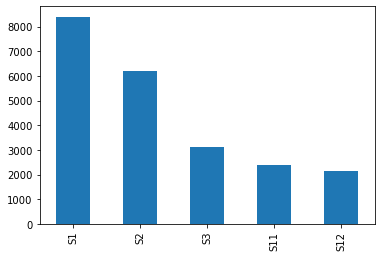

In [43]:
crm['sample'].value_counts().plot(kind="bar")

<AxesSubplot:>

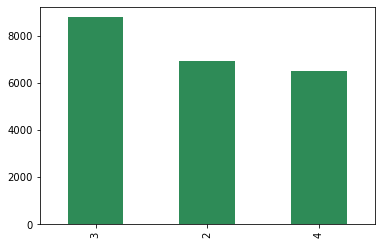

In [45]:
crm['xrf'].value_counts().plot(kind="bar", color="seagreen")

In [50]:
sample_unique=crm['sample'].unique()
sample_unique

array(['S1', 'S2', 'S11', 'S3', 'S12'], dtype=object)

#1.) Daily element trend for different XRFs
#2.) Did Fe trend change with time?


In [10]:
crm.groupby(["sample","xrf"])["ni","fe","alu"].mean().round(2)

/var/folders/g6/qw3t2lbx7x91r1mfyp6k77k00000gn/T/ipykernel_1032/2908783004.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  crm.groupby(["sample","xrf"])["ni","fe","alu"].mean().round(2)


ni     fe    alu
sample xrf                    
S1     2    0.64  48.52   9.94
       3    0.63  48.35  10.04
       4    0.63  48.48   8.11
S11    2    0.98   8.16   1.66
       3    1.00   8.30   1.62
       4    0.98   8.22   1.05
S12    2    1.37  13.66   1.47
       3    1.39  13.96   1.35
       4    1.37  13.50   1.10
S2     2    0.66  51.48   6.65
       3    0.64  51.20   6.77
       4    0.65  51.83   6.47
S3     2    1.01  53.12   3.31
       3    0.98  52.92   3.37
       4    0.99  53.72   3.98

In [ ]:
git adbdhbqdhb